In [109]:
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt  

In [110]:
#load dataset
df_original= pd.read_csv("Churn_Modelling.csv")
df = df_original
# show top 5 rows of dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [111]:
print("Dataset has {} rows and {} Columns".format(df.shape[0],df.shape[1])) 

Dataset has 10000 rows and 14 Columns


In [112]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [113]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [114]:
df.duplicated().sum()

0

In [115]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [116]:
#check for duplicate values
df.duplicated().sum()

0

In [117]:
"""Handling Missing Data"""
def missing_data(df):
     
        # check null values in each column
        print("\nNull values in dataset:\n",df.isnull().sum())
        
        #check for minimum values
        print("\n\nMin values:\n",  df.min())
        
        df.replace(np.NaN, df.mean, inplace = True)
        
        print("\n After replacing minimum values\n",df.min())
        
        # check for duplicate data
#         df.duplicated().sum()
#         print("\nCheck duplicate values:\n",df.duplicated().sum())
missing_data(df)


Null values in dataset:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Min values:
 RowNumber                 1
CustomerId         15565701
Surname               Abazu
CreditScore             350
Geography            France
Gender               Female
Age                      18
Tenure                    0
Balance                   0
NumOfProducts             1
HasCrCard                 0
IsActiveMember            0
EstimatedSalary       11.58
Exited                    0
dtype: object

 After replacing minimum values
 RowNumber                 1
CustomerId         15565701
Surname               Abazu
CreditScore             350
Geography            France
Gender               Female
Age                      18
Tenure          

In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [119]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [120]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [121]:
df.shape

(10000, 11)

In [122]:
# Handle categorical data
# df = pd.get_dummies(df)
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [123]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [131]:
df = pd.get_dummies(df)

In [132]:
# get dummy variables whose are in categorical type
# for name in df.columns:
#     if df[name].dtype == "object":
#             df[name] = pd.get_dummies(df[name]) 

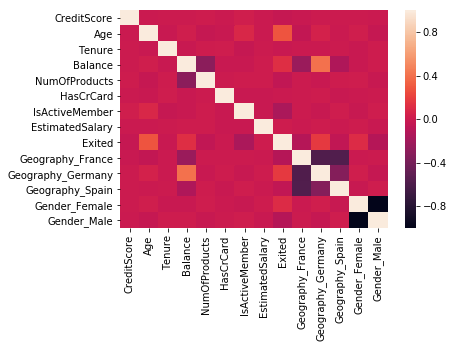

In [133]:
# check the correlation
corr = df.corr()
sb.heatmap(corr)

In [134]:
df.shape

(10000, 14)

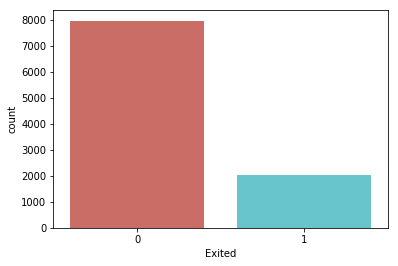

In [135]:
sb.countplot(x='Exited',  data=df, palette='hls')
plt.show()

In [136]:
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df
df = Feature_Scaling(df)

In [141]:
# seperate data set
def features(df):
    y_new = df.Exited
#     y.head()
    df = df.drop('Exited', axis = 1)
    print("Seperate Exited column from dataset")
    return df, y_new
df, y_new = features(df)

Seperate Exited column from dataset


In [142]:
def split_data(df):
    # 70 % training datset
    train_per = int(0.70*len(df))
    print("Train dataset:", train_per)
    # 30% test dataset
    test_per = len(df)-train_per
    print("Test dataset:", test_per)
    
    print("\nConvert pandas datafrem into numpy")
    x_train_data = np.array(df[:train_per])   
    x_test_data  = np.array(df[:test_per])
    
    
    train_per_y = int(0.70*len(y_new))
    test_per_y = len(y_new)-train_per_y

    
    y_train_data = np.array(y_new[:train_per_y])
    y_test_data = np.array(y_new[:test_per_y])
    
    #reshpe (1357,) to (1357,1) for train and test dataset
    y_test_data = y_test_data.reshape(-1,1)
    y_train_data = y_train_data.reshape(-1,1)
        
    
    print("\nX train data shape:", x_train_data.shape)
    print("y train data shape:", y_train_data.shape)
    print("\nX test data shape:", x_test_data.shape)
    print("y test data shape:", y_test_data.shape)

    return x_train_data, y_train_data, x_test_data, y_test_data

x_train_data, y_train_data, x_test_data, y_test_data = split_data(df)        

Train dataset: 7000
Test dataset: 3000

Convert pandas datafrem into numpy

X train data shape: (7000, 13)
y train data shape: (7000, 1)

X test data shape: (3000, 13)
y test data shape: (3000, 1)


In [143]:
class Logistic:
    def __init__(self):
        # Learning Rate
        self.l_rate = 0.060

        # Total iterations
        self.epoch = 60000
        
    def gradient_descent(self, x_data_train, y_data_train, theta_vector):       
        print("X train & Y train & theta vector", x_data_train.shape, y_data_train.shape, theta_vector.shape)
        #X train & Y train & theta vector (3164, 22) (3164, 1) (22, 1)
        for i in range(self.epoch):
            z = np.dot(x_data_train, theta_vector)
            sigmoid = (1 / (1 + np.exp(-z)))
            a = sigmoid - y_data_train
            temp = np.dot( x_data_train.T, a)
            temp = np.dot(temp, self.l_rate) / len(x_data_train)
            theta_vector = theta_vector - temp   #22, 1)
            
#             temp1 = np.multiply(y_train_data.T, np.log(sigmoid))  #(1, 3164)
#             temp2 = np.multiply((1 - y_train_data.T),np.log(np.abs(1- sigmoid)))  # (1, 3164)
#             cost = temp1 + temp2
            
        print("\n\nhypo_multiplication shape",z.shape)
        print("sigmoid shape", sigmoid.shape)
        print("error shape", a.shape)
        print("temp", temp.shape)
        print("theta shape", theta_vector.shape)
        
#         print("\nTemp1 shape:", temp1.shape)
#         print("Temp2 shape:", temp2.shape)
#         print("Cost shape:", cost.shape)
        
        return theta_vector

    def prediction(self, x_data_test, theta_vector):
        print("\n Prediction function")
        print("x : theta",x_data_test.shape, theta_vector.shape )
        
        y_prediction = np.zeros((x_data_test.shape[0], 1), dtype=float)
        print("y_prediction:",y_prediction.shape)
        # use sigmoid function to predict y data
        z = np.dot(x_data_test, theta_vector)
        sigmoid = np.array(1 / (1 + np.exp(-z)))
        # apply decision boundaries if data < 0.5 it will be in class_0 or in class_1  
        for i in (range(0, len(sigmoid))):
            if round(sigmoid[i][0], 2) <= 0.5:
                y_prediction[i][0] = 0
            else:
                y_prediction[i][0] = 1
#         print("final shape......", y_prediction.shape)
#         y_prediction = np.reshape(y_prediction, (len(y_prediction), 1))
#         print("final shape", y_prediction.shape)
        return y_prediction


def main(df, x_train_data, y_train_data, x_test_data,y_test_data ):
    # class obj created
    obj = Logistic()
    
    print("X train shape original", x_train_data.shape)
    # feature columns
    x_col = 13
    theta_vector = np.full((x_col +1 ,1), 0.05)
#     theta_vector = np.zeros(((x_col + 1), 1), dtype='f')
   
    # append new col bcoz we have 6 features as, x1,x2,....x6 but 7 thetas so add new x(np.opnes)
    # unction is used to stack 1-D arrays as columns into a 2-D array
    # Stacking the two arrays   
    x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))
    print("x train data .....", x_train_data.shape)
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))
    
    # call function gradient_descent
    theta = obj.gradient_descent(x_train_data, y_train_data, theta_vector)
    print(theta.shape)
   
    #   call function to predict y  
    y_test_prediction = obj.prediction(x_test_data, theta)
    y_train_prediction = obj.prediction(x_train_data, theta)
    
#     print("\n\n after function")
#     print("y train shape",y_train_data.shape)
#     print("y_train_prediction shape",y_train_prediction.shape)
# #     accuracy(y_test_data, y_predict)
#     print("y_test_prediction shape",y_test_prediction.shape)
#     print("y test shape",y_test_data.shape)
    
    print("\n\nAccuracy : ")
    # calculate accuracy 
    train_acc = round(float(100 - np.mean(np.abs(y_train_prediction - y_train_data)) * 100))
    test_acc = round(float(100 - np.mean(np.abs(y_test_prediction - y_test_data)) * 100))
    print("Train dataset accuracy: ", train_acc, "Test dataset accuracy:", test_acc)


main(df, x_train_data,y_train_data,x_test_data,y_test_data)


X train shape original (7000, 13)
x train data ..... (7000, 14)
X train & Y train & theta vector (7000, 14) (7000, 1) (14, 1)


hypo_multiplication shape (7000, 1)
sigmoid shape (7000, 1)
error shape (7000, 1)
temp (14, 1)
theta shape (14, 1)
(14, 1)

 Prediction function
x : theta (3000, 14) (14, 1)
y_prediction: (3000, 1)

 Prediction function
x : theta (7000, 14) (14, 1)
y_prediction: (7000, 1)


Accuracy : 
Train dataset accuracy:  81 Test dataset accuracy: 81
